In [30]:
from RCN import *
from calibrate_option import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
table = np.loadtxt('Data-Project1-Fin404.txt', skiprows=1)

In [38]:
strikes = table[:,0]
call_prices = table[:,1]
put_prices = table[:,2]

In [59]:
y = call_prices - put_prices
x = strikes
y = np.array(y).reshape((-1,1))
x = np.array(x).reshape((-1,1))
lm = LinearRegression().fit(x,y)
lm.score(x,y)
# put-call parity holds

0.9999999999925049

In [60]:
alpha = lm.intercept_
beta = lm.coef_

In [84]:
r = -np.log(-beta).item()
Delta = 1/12
S_0 = 11118
delta = -np.log(alpha/S_0).item()
q = 1/2
T = 12

In [19]:
U_min = 1
U_max = np.exp(Delta*r)/q
Us = np.arange(U_min, U_max, .0001)

In [92]:
error_U = []
for U in Us:
    call_prices_U = []
    for s in range(len(strikes)):
        call = calibrate_option(r, Delta, S_0, delta, U, q, T, strikes[s])
        call_prices_U.append(call.price_option(put=False))
    error = ((np.array(call_prices_U) - call_prices)**2).sum()
    error_U.append(error)

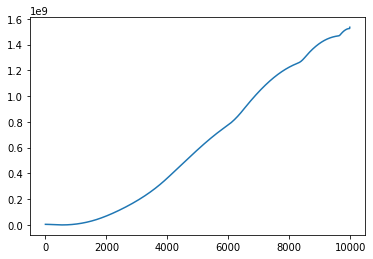

In [93]:
plt.plot(error_U)

In [94]:
min_idx = np.argsort(error_U)[0]

In [95]:
U_optimal = Us[min_idx]
D_optimal = (np.exp(Delta*r) - q*U_optimal)/(1-q)

In [96]:
print('Calibrated U: {:.3}\nCalibrated D: {:.3}'.format(U_optimal, D_optimal))

Calibrated U: 1.05
Calibrated D: 0.944


In [97]:
# Test calibrated model
test1 = calibrate_option(r, Delta, S_0, delta, U_optimal, q, T, 10200)
test1.price_option(put=False)

1114.8659140204675

In [ ]:
# wheras price of the call in the table for that strike is 1114.862